# Exploration
- Exploration: the interaction between independent variables and the target variable is explored using visualization and statistical testing
- Exploration: Clustering is used to explore the data. A conclusion, supported by statistical testing and visualization, is drawn on whether or not the clusters are helpful/useful. At least 3 combinations of features for clustering should be tried.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.cluster import KMeans
from env import get_db_url
import acquire
import prepare
from prepare import percentage_stacked_plot
import warnings
warnings.filterwarnings("ignore")

In [2]:
#acquire data
df = acquire.get_zillow_data()

In [3]:
df.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,1727539,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,...,6.059063e+13,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,1387261,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,...,6.111001e+13,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,11677,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,...,6.059022e+13,0.005383,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,2288172,12177905,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,...,6.037300e+13,-0.103410,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,1970746,10887214,1.0,NaN,NaN,3.0,3.0,NaN,8.0,3.0,...,6.037124e+13,0.006940,2017-01-01,Central,NaN,NaN,Central,Condominium,NaN,NaN


In [4]:
import prepare

In [5]:
#prepare data from prepare function
df = prepare.prep_zillow(df)

The following 34 columns were dropped because they were missing more than 50.0% of data: 
['airconditioningtypeid', 'architecturalstyletypeid', 'basementsqft', 'buildingclasstypeid', 'decktypeid', 'finishedfloor1squarefeet', 'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50', 'finishedsquarefeet6', 'fireplacecnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa', 'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'regionidneighborhood', 'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid', 'yardbuildingsqft17', 'yardbuildingsqft26', 'numberofstories', 'fireplaceflag', 'taxdelinquencyflag', 'taxdelinquencyyear', 'airconditioningdesc', 'architecturalstyledesc', 'buildingclassdesc', 'storydesc', 'typeconstructiondesc']

0 rows were dropped because they were missing more than 50.0% of data
Features added were transaction_month extracted from transaction_date, County names instead of fips code, and converted yearbuilt to age in years. 



In [6]:
df.head()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,rawcensustractandblock,...,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,tax_rate,age,transaction_month,county
28,12036177,2.0,3,1851,6037,34103373.0,-118293280.0,6714,0100,60371892,...,85035,52771,1232,60371892012001,0.206470,2017-01-02,1.448815,97,1,Los Angeles
44,12106936,2.0,3,1447,6037,34166370.0,-118151336.0,7283,0100,60374616,...,70755,13021,1050,60374616001002,0.075156,2017-01-02,1.483994,116,1,Los Angeles
67,11016518,2.0,4,1625,6037,34282275.0,-118492692.0,8427,0100,60371066,...,97097,42430,1307,60371066461002,-0.060470,2017-01-02,1.346077,61,1,Los Angeles
70,11018202,1.0,2,812,6037,34276431.0,-118447368.0,7150,0100,60371095,...,40746,19233,668,60371095003018,0.021262,2017-01-02,1.639425,100,1,Los Angeles
86,12579560,1.0,2,1027,6037,33816016.0,-118271776.0,5574,0100,60375437,...,49034,21513,1179,60375437025006,-0.025721,2017-01-02,2.404454,66,1,Los Angeles


# Explore on Train only

In [7]:
#split my data
df = prepare.split_zillow_data(df)

Train: 3497 rows, 23 cols
Validate: 1500 rows, 23 cols
Test: 1250 rows, 23 cols


In [8]:
train, validate, test = df

In [9]:
train.shape

(3497, 23)

In [10]:
train.head()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,rawcensustractandblock,...,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,tax_rate,age,transaction_month,county
31129,11717042,1.0,1,810,6037,34017073.0,-118310565.0,5168,0100,60372314,...,23559,15717,346,60372314001002,-0.043638,2017-04-28,1.468653,95,4,Los Angeles
3021,12675745,1.0,3,1106,6037,33851499.0,-118365740.0,5881,0100,60376505,...,84037,59621,1207,60376505022000,0.035143,2017-01-13,1.436272,62,1,Los Angeles
7086,12575721,2.0,3,1362,6037,33852314.0,-118234272.0,5510,0100,60375433,...,49236,13435,1194,60375433042000,-0.220062,2017-03-17,2.425055,53,3,Los Angeles
42008,12202507,2.0,3,1280,6037,33962599.0,-118259356.0,5100,0100,60372398,...,32047,14469,467,60372398021002,-0.081519,2017-06-01,1.457235,90,6,Los Angeles
55288,14455797,2.0,3,1290,6059,33544057.0,-117663497.0,7150,122,60590320,...,62108,24400,576,60590320223032,-0.049785,2017-07-10,0.927417,47,7,Orange


In [11]:
train.logerror.describe()

count    3497.000000
mean        0.027646
std         0.190704
min        -1.341564
25%        -0.029759
50%         0.008127
75%         0.049766
max         3.100913
Name: logerror, dtype: float64

In [12]:
# labels numerical columns for plotting histogram
numcols = [col for col in train.columns if train[col].dtype !='O']
numcols

['parcelid',
 'bathroomcnt',
 'bedroomcnt',
 'calculatedfinishedsquarefeet',
 'fips',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'rawcensustractandblock',
 'regionidcity',
 'regionidzip',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'landtaxvaluedollarcnt',
 'taxamount',
 'censustractandblock',
 'logerror',
 'tax_rate',
 'age',
 'transaction_month']

<AxesSubplot:xlabel='bathroomcnt', ylabel='Density'>

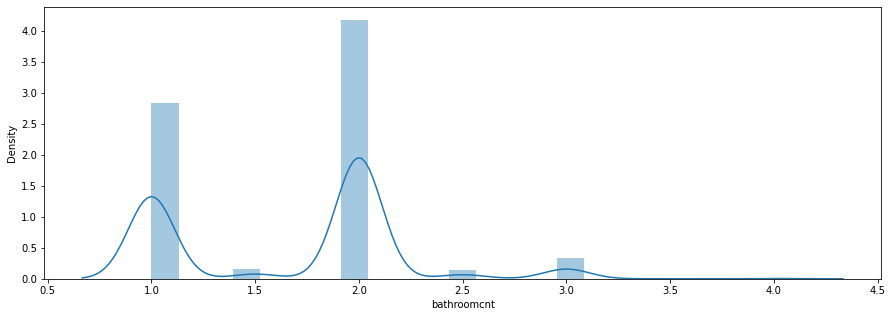

In [13]:
plt.figure(figsize=(15,5))
sns.distplot(train.bathroomcnt)

<AxesSubplot:xlabel='bedroomcnt', ylabel='Density'>

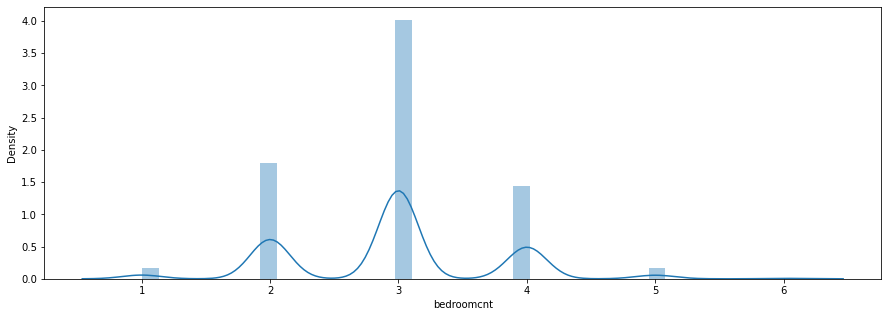

In [14]:
plt.figure(figsize=(15,5))
sns.distplot(train.bedroomcnt)

<AxesSubplot:xlabel='calculatedfinishedsquarefeet', ylabel='Density'>

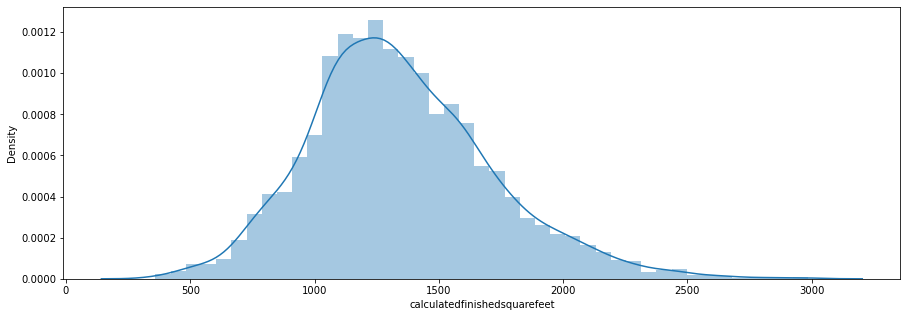

In [15]:
plt.figure(figsize=(15,5))
sns.distplot(train.calculatedfinishedsquarefeet)

<AxesSubplot:xlabel='lotsizesquarefeet', ylabel='Density'>

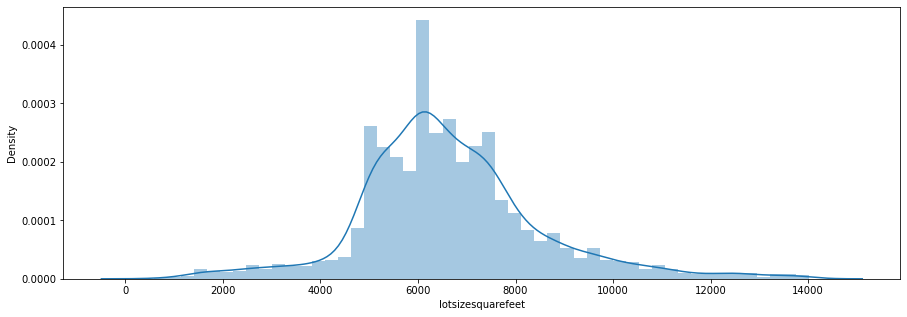

In [16]:
plt.figure(figsize=(15,5))
sns.distplot(train.lotsizesquarefeet)

<AxesSubplot:xlabel='rawcensustractandblock', ylabel='Density'>

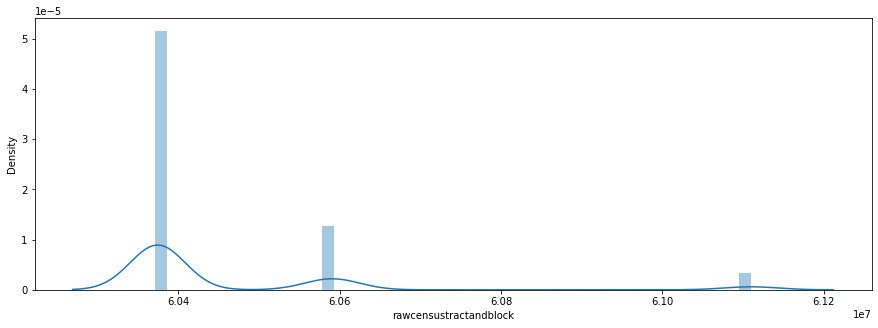

In [17]:
plt.figure(figsize=(15,5))
sns.distplot(train.rawcensustractandblock)

<AxesSubplot:xlabel='regionidcity', ylabel='Density'>

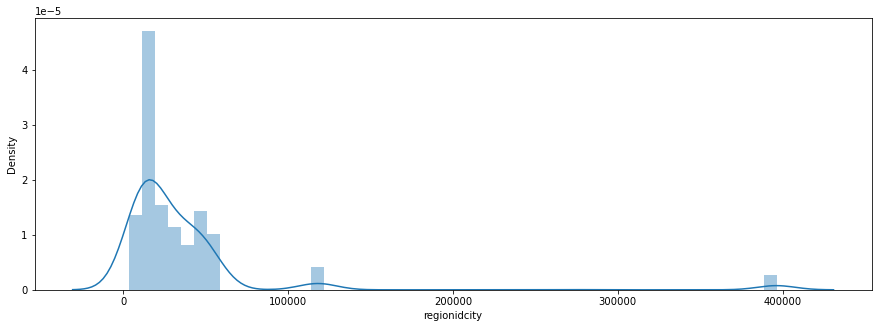

In [18]:
plt.figure(figsize=(15,5))
sns.distplot(train.regionidcity)

<AxesSubplot:xlabel='regionidzip', ylabel='Density'>

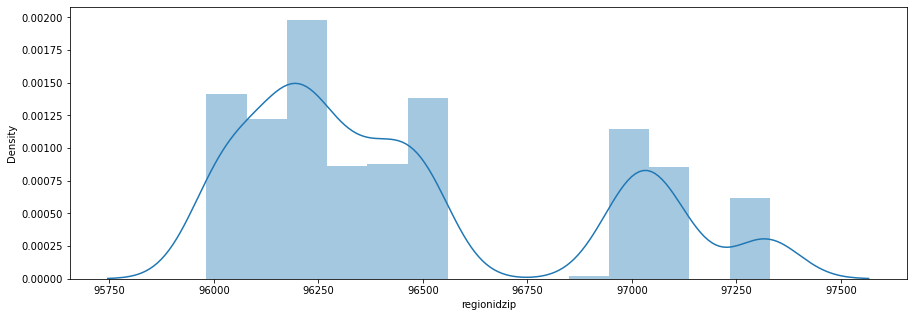

In [19]:
plt.figure(figsize=(15,5))
sns.distplot(train.regionidzip)

<AxesSubplot:xlabel='structuretaxvaluedollarcnt', ylabel='Density'>

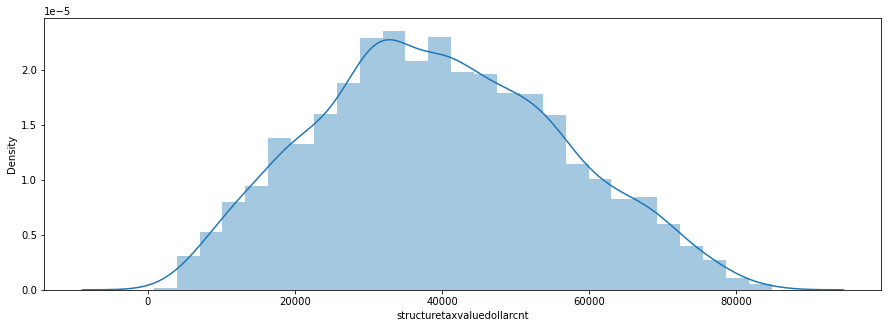

In [20]:
plt.figure(figsize=(15,5))
sns.distplot(train.structuretaxvaluedollarcnt)

<AxesSubplot:xlabel='taxvaluedollarcnt', ylabel='Density'>

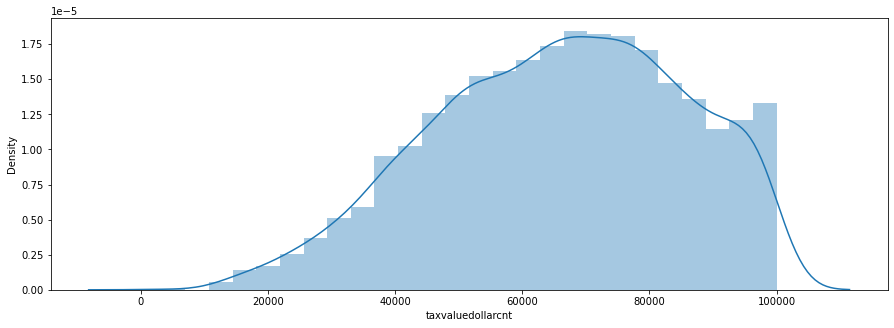

In [21]:
plt.figure(figsize=(15,5))
sns.distplot(train.taxvaluedollarcnt)

<AxesSubplot:xlabel='landtaxvaluedollarcnt', ylabel='Density'>

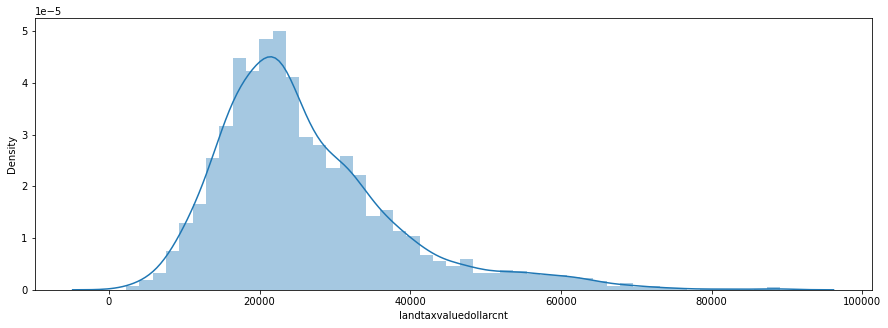

In [22]:
plt.figure(figsize=(15,5))
sns.distplot(train.landtaxvaluedollarcnt)

<AxesSubplot:xlabel='taxamount', ylabel='Density'>

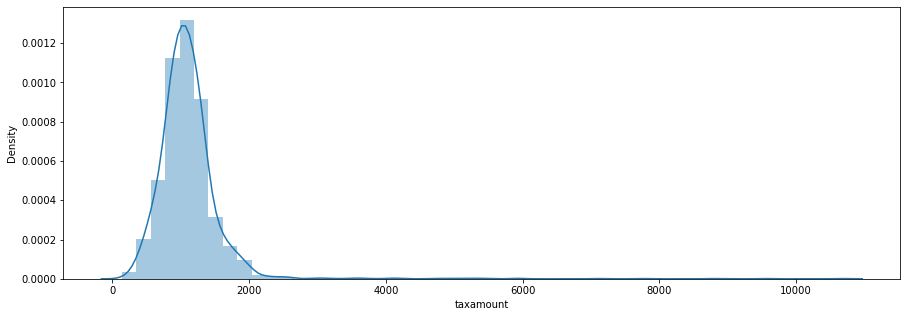

In [23]:
plt.figure(figsize=(15,5))
sns.distplot(train.taxamount)

<AxesSubplot:xlabel='censustractandblock', ylabel='Density'>

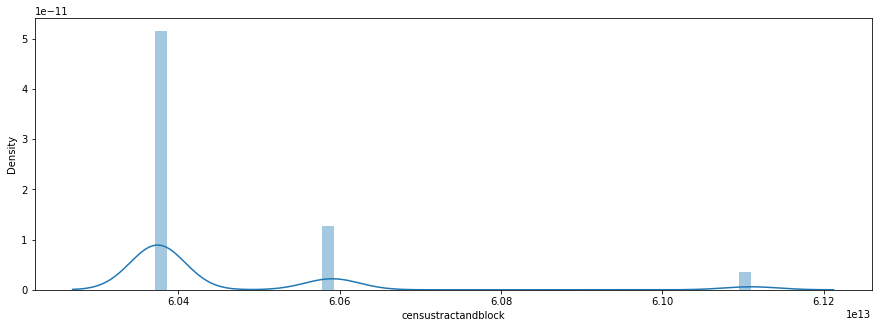

In [24]:
plt.figure(figsize=(15,5))
sns.distplot(train.censustractandblock)

<AxesSubplot:xlabel='logerror', ylabel='Density'>

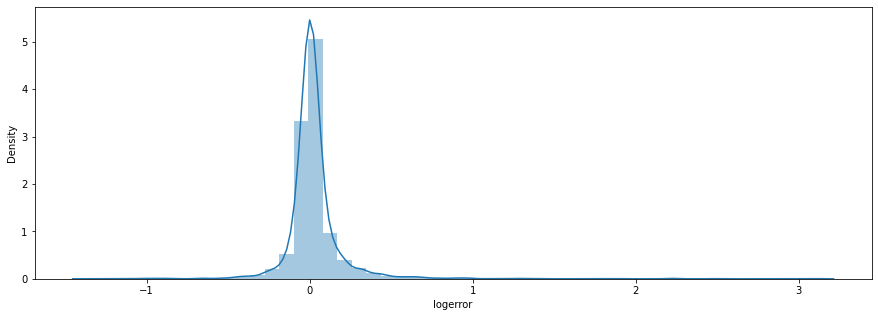

In [25]:
plt.figure(figsize=(15,5))
sns.distplot(train.logerror)

<AxesSubplot:xlabel='tax_rate', ylabel='Density'>

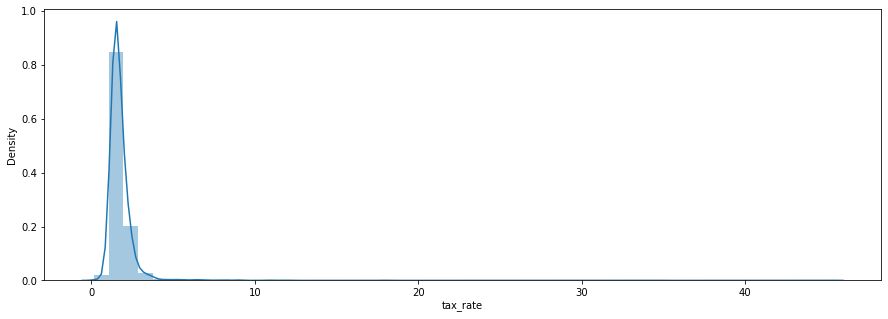

In [26]:
plt.figure(figsize=(15,5))
sns.distplot(train.tax_rate)

<AxesSubplot:xlabel='age', ylabel='Density'>

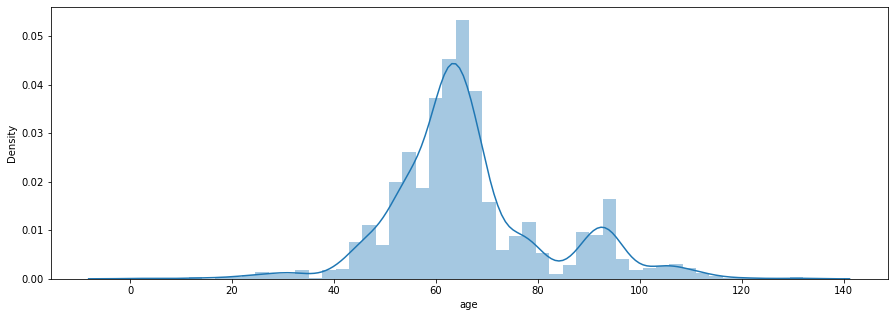

In [27]:
plt.figure(figsize=(15,5))
sns.distplot(train.age)

parcelid


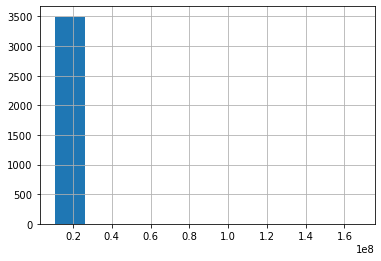

bathroomcnt


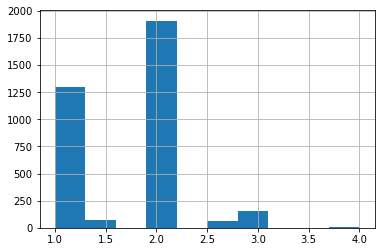

bedroomcnt


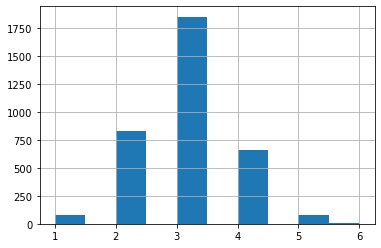

calculatedfinishedsquarefeet


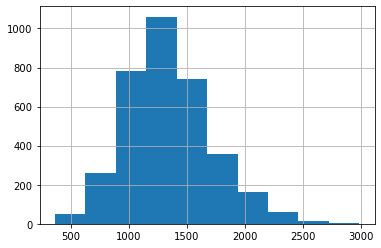

fips


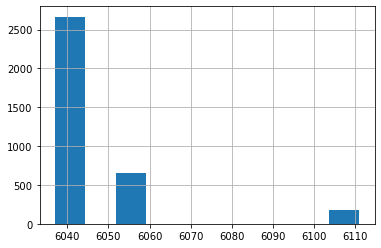

latitude


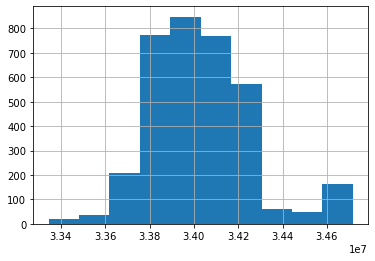

longitude


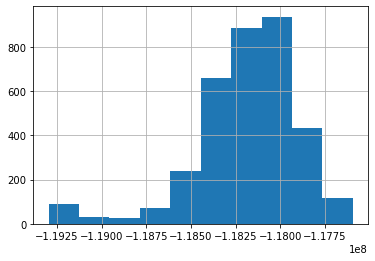

lotsizesquarefeet


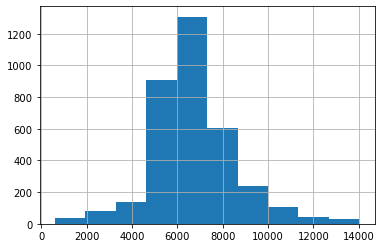

rawcensustractandblock


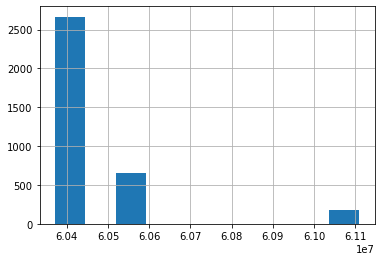

regionidcity


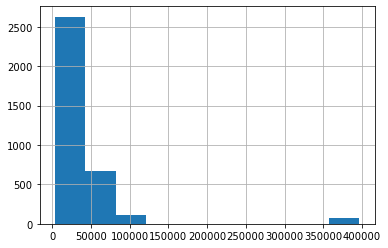

regionidzip


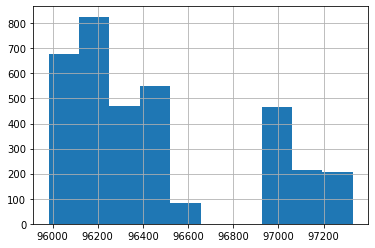

structuretaxvaluedollarcnt


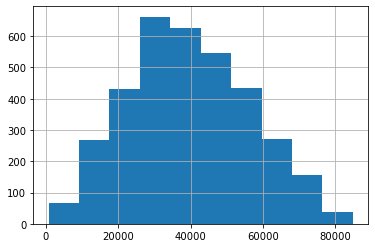

taxvaluedollarcnt


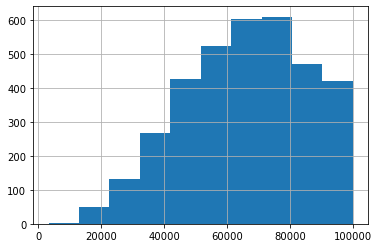

landtaxvaluedollarcnt


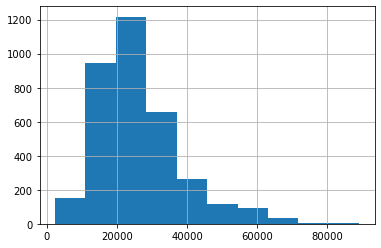

taxamount


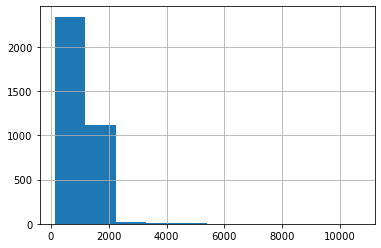

censustractandblock


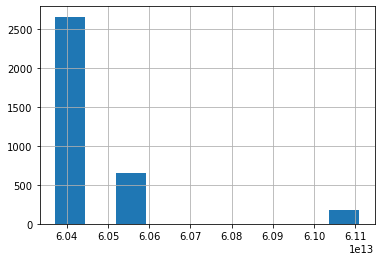

logerror


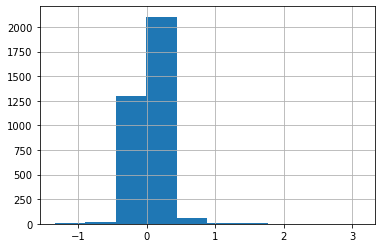

tax_rate


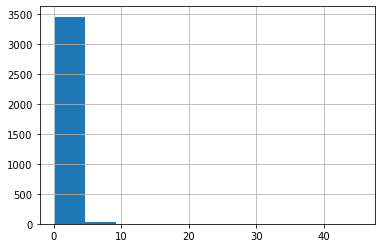

age


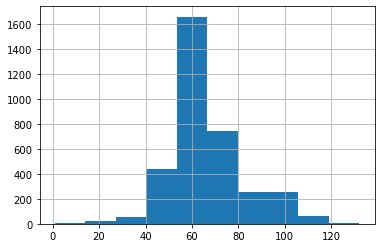

transaction_month


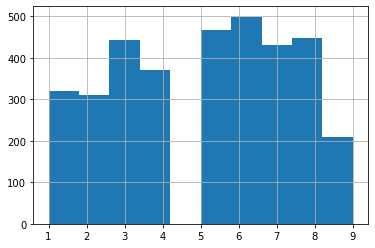

In [28]:
#histograms of numeric columns
for col in numcols:
    print(col)
    train[col].hist()
    plt.show()

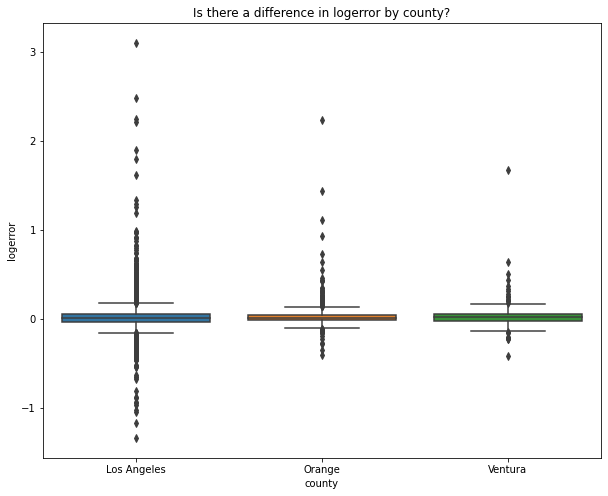

In [29]:
# plots logerror by county
plt.figure(figsize=(10,8))
sns.boxplot(train.county, train.logerror)
plt.title("Is there a difference in logerror by county?")
plt.show()

Text(0.5, 1.0, '"Is there a difference in logerror by county?"')

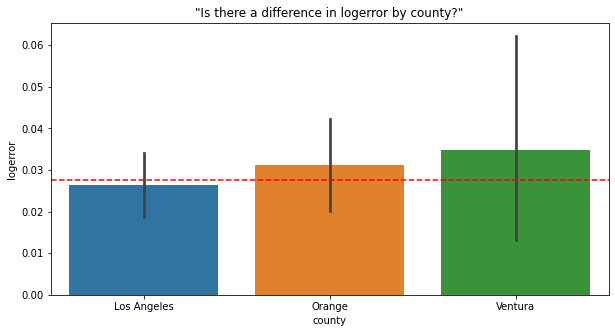

In [30]:
p = plt.figure(figsize=(10,5))
p = sns.barplot(train.county, train.logerror)
lmean = train.logerror.mean()
p = plt.axhline(lmean, ls='--', color='red', )
plt.title('"Is there a difference in logerror by county?"')

In [31]:
overall_rate = train.logerror.mean()
overall_rate

0.027646480352707975

### Ventura appears to have a higher logerror

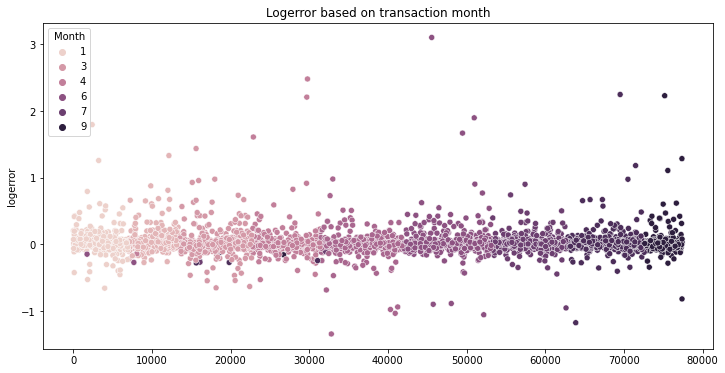

In [32]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=train.index,y=train.logerror,hue=train.transaction_month).set_title("Logerror based on transaction month")
plt.legend(loc='upper left', title='Month')
plt.show()

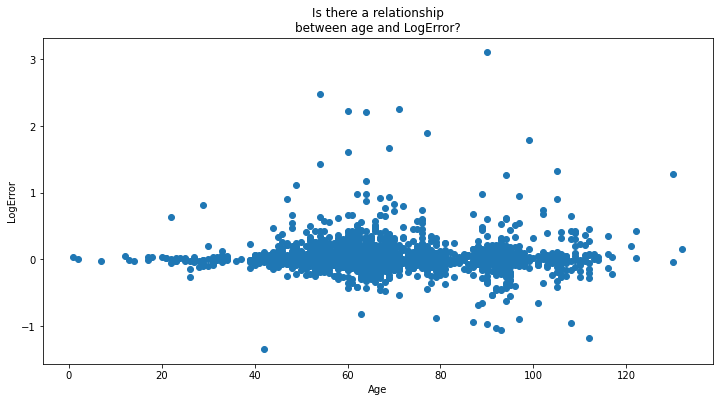

In [33]:
# plot age by logerror
plt.figure(figsize=(12,6))
plt.scatter(train.age, train.logerror)
plt.xlabel("Age")
plt.ylabel("LogError")
plt.title("Is there a relationship\nbetween age and LogError?")
plt.show()

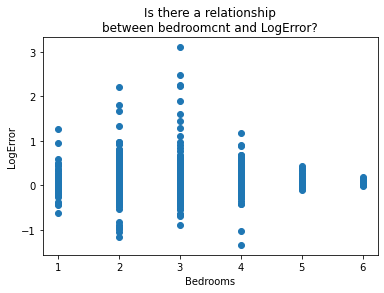

In [34]:
# plot bedroomcnt by logError
plt.scatter(train.bedroomcnt, train.logerror)
plt.xlabel("Bedrooms")
plt.ylabel("LogError")
plt.title("Is there a relationship\nbetween bedroomcnt and LogError?")
plt.show()

In [35]:
# test the assumption of equal variance

stats.levene(train[train.age <= 40].logerror, 
             train[train.age > 40].logerror
            )


LeveneResult(statistic=2.477666143203513, pvalue=0.1155639981196114)

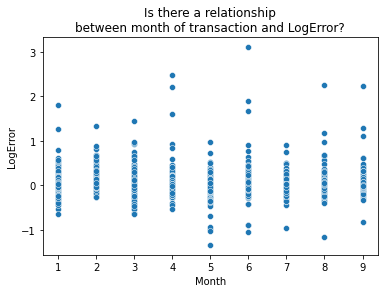

In [36]:

sns.scatterplot(x=train.transaction_month, y=train.logerror)
plt.xlabel("Month")
plt.ylabel("LogError")
plt.title("Is there a relationship\nbetween month of transaction and LogError?")
plt.show()

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

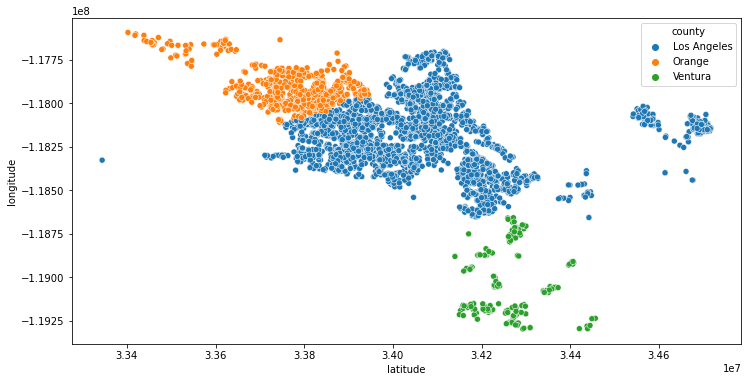

In [37]:
# Plots lats/longs by logerror
plt.figure(figsize=(12,6))
sns.scatterplot(x=train.latitude , y=train.longitude, hue=train.county)

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

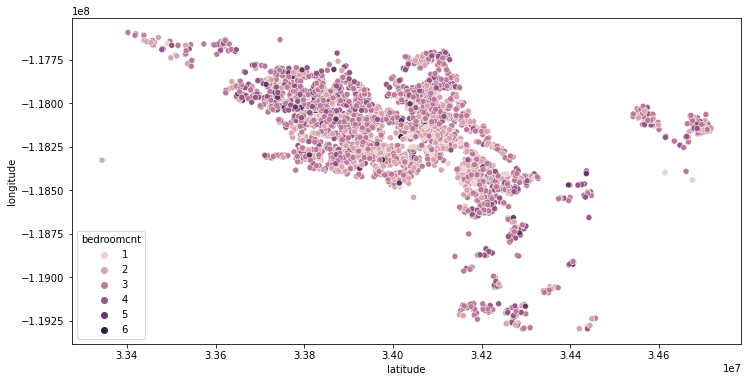

In [38]:
# Plots lats/longs by logerror
plt.figure(figsize=(12,6))
sns.scatterplot(x=train.latitude , y=train.longitude, hue=train.bedroomcnt)

<AxesSubplot:xlabel='tax_rate', ylabel='calculatedfinishedsquarefeet'>

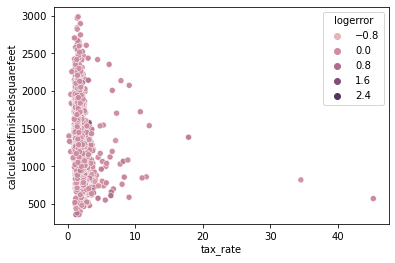

In [39]:
sns.scatterplot(x=train.tax_rate , y=train.calculatedfinishedsquarefeet, hue=train.logerror)

<AxesSubplot:xlabel='tax_rate', ylabel='age'>

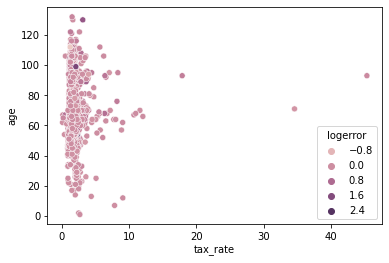

In [40]:
sns.scatterplot(x=train.tax_rate , y=train.age, hue=train.logerror)

<AxesSubplot:xlabel='taxvaluedollarcnt', ylabel='bedroomcnt'>

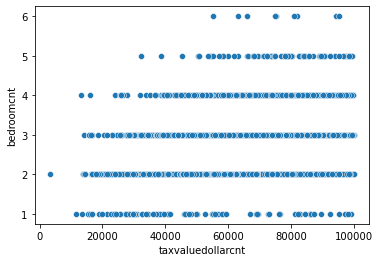

In [41]:
sns.scatterplot(x=train.taxvaluedollarcnt , y=train.bedroomcnt)

<AxesSubplot:xlabel='taxvaluedollarcnt', ylabel='landtaxvaluedollarcnt'>

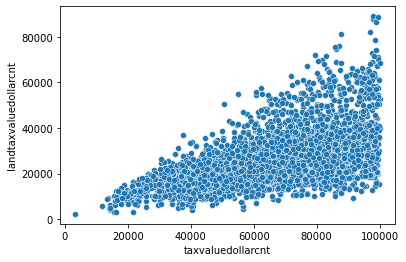

In [42]:
sns.scatterplot(x=train.taxvaluedollarcnt , y=train.landtaxvaluedollarcnt)

<AxesSubplot:xlabel='taxvaluedollarcnt', ylabel='taxamount'>

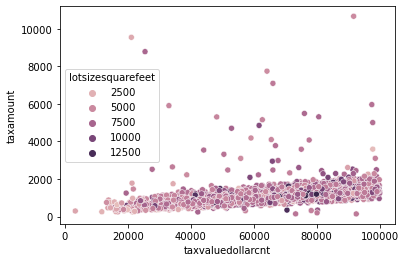

In [43]:
sns.scatterplot(x=train.taxvaluedollarcnt, y=train.taxamount, hue=train.lotsizesquarefeet)

<AxesSubplot:xlabel='taxvaluedollarcnt', ylabel='taxamount'>

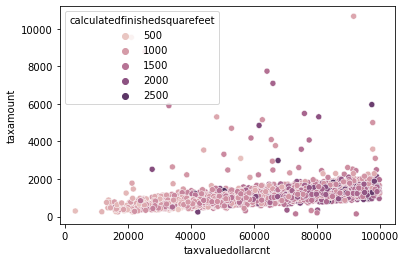

In [44]:
sns.scatterplot(x=train.taxvaluedollarcnt, y=train.taxamount, hue=train.calculatedfinishedsquarefeet)

In [45]:
train_scaled, validate_scaled, test_scaled = prepare.scale_data(train, validate, test)

In [46]:
train_scaled

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,regionidzip,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,tax_rate,age,transaction_month
31129,-0.259474,-1.187247,-2.485576,-1.445021,-0.449694,-0.054855,-0.420038,-0.797617,-0.459800,-0.405945,-1.047807,-1.921402,-2.159641,-0.867993,-1.482210,-0.460090,-0.247775,1.834212,-0.430538
3021,-0.018493,-1.187247,0.050770,-0.647264,-0.449694,-0.767053,-0.611828,-0.412379,-0.435699,0.316324,-0.754649,-0.921732,0.929734,2.780629,0.194297,-0.435987,-0.274604,-0.282614,-1.696096
7086,-0.043635,0.571619,0.050770,0.042688,-0.449694,-0.763547,-0.154841,-0.612833,-0.441864,-0.205589,-0.583226,-0.235039,-0.847992,-1.057637,0.168984,-0.442153,0.544634,-0.859930,-0.852391
42008,-0.137447,0.571619,0.050770,-0.178312,-0.449694,-0.289169,-0.242034,-0.834358,-0.459317,-0.405945,-1.199355,-1.334169,-1.726051,-0.971707,-1.246603,-0.459607,-0.257236,1.513481,0.413167
55288,0.428942,0.571619,0.050770,-0.151361,0.805630,-2.089479,1.829189,0.273270,0.793905,-0.400376,1.319819,-0.120018,-0.190457,-0.146396,-1.034362,0.793685,-0.696207,-1.244808,0.835020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60838,-0.452625,-1.187247,0.050770,-0.477471,-0.449694,0.685224,-0.457826,-1.607537,-0.455246,6.147988,-0.071441,0.239825,0.157314,-0.076422,-0.498893,-0.455535,-0.441500,-0.090175,0.835020
76488,-0.295200,0.571619,2.587117,1.330958,-0.449694,-0.066374,-0.931848,0.190063,-0.432720,-0.157922,-0.777008,-0.409291,1.490825,2.987393,1.206821,-0.433008,0.041250,1.000311,1.678725
16607,-0.476513,0.571619,-1.217403,-0.038166,-0.449694,0.590430,-1.076872,-0.362130,-0.465074,-0.405945,-0.096285,-0.022487,0.728622,1.214441,-1.774284,-0.465364,-1.261864,-0.090175,-0.852391
65599,-0.308215,0.571619,0.050770,0.279859,-0.449694,-0.207300,-0.773213,-0.472353,-0.457259,-0.405945,-1.037870,0.015089,1.405824,2.264384,0.799864,-0.457548,-0.117395,-0.154322,1.256873


## Clustering for Features

In [47]:
# list of variables I will cluster on.
X = train_scaled[['taxvaluedollarcnt', 'taxamount','tax_rate']]

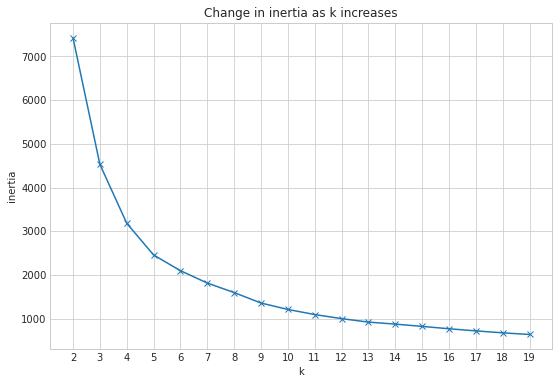

In [48]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 20)}).plot(marker='x')
    plt.xticks(range(2, 20))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [49]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(n_clusters=4)

In [50]:
train_scaled['cluster_tax'] = kmeans.predict(X)

<AxesSubplot:xlabel='taxvaluedollarcnt', ylabel='tax_rate'>

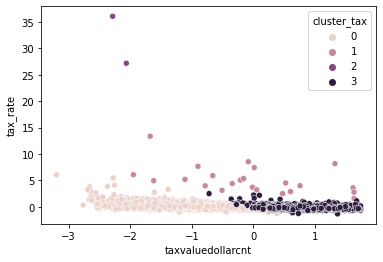

In [51]:
sns.scatterplot(x=train_scaled.taxvaluedollarcnt,y=train_scaled.tax_rate, hue=train_scaled.cluster_tax)

In [52]:
X = train_scaled[['calculatedfinishedsquarefeet', 'lotsizesquarefeet']]

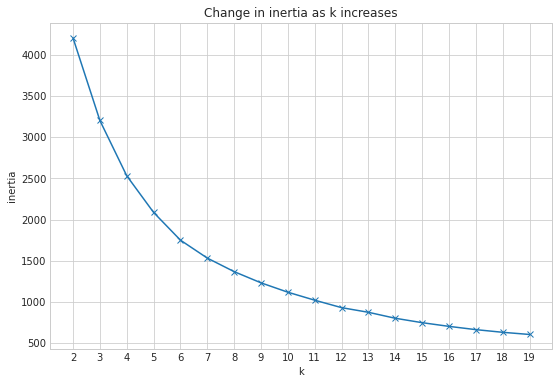

In [53]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 20)}).plot(marker='x')
    plt.xticks(range(2, 20))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')


In [54]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(n_clusters=4)

In [55]:
train_scaled['cluster_sqft'] = kmeans.predict(X)

<AxesSubplot:xlabel='calculatedfinishedsquarefeet', ylabel='lotsizesquarefeet'>

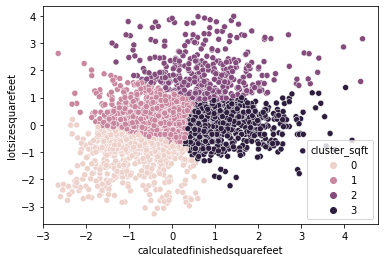

In [56]:
sns.scatterplot(x=train_scaled.calculatedfinishedsquarefeet, y=train_scaled.lotsizesquarefeet, hue=train_scaled.cluster_sqft)

In [57]:
X = train_scaled[['bedroomcnt', 'bathroomcnt','age']]

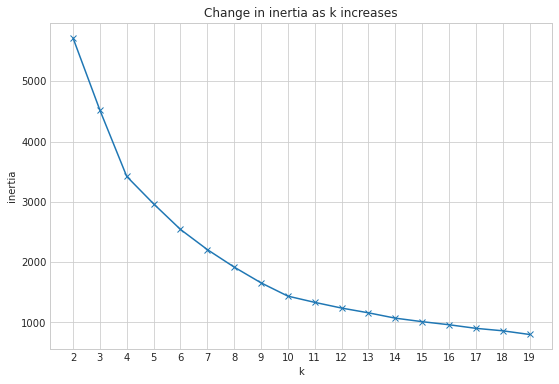

In [58]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 20)}).plot(marker='x')
    plt.xticks(range(2, 20))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [59]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)

KMeans(n_clusters=6)

In [60]:
train_scaled['cluster_rooms'] = kmeans.predict(X)

<AxesSubplot:xlabel='bedroomcnt', ylabel='logerror'>

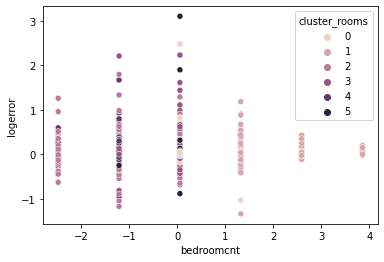

In [61]:
sns.scatterplot(x=train_scaled.bedroomcnt, y=train.logerror, hue=train_scaled.cluster_rooms)

Text(0.5, 1.0, 'Square Feet of Home / Log Error')

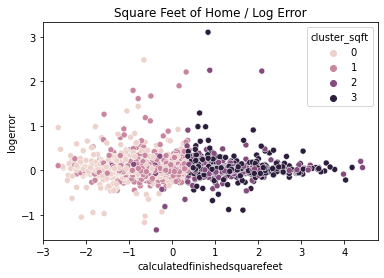

In [62]:
sns.scatterplot(x=train_scaled.calculatedfinishedsquarefeet, y=train.logerror, hue=train_scaled.cluster_sqft)
plt.title('Square Feet of Home / Log Error')

<AxesSubplot:xlabel='lotsizesquarefeet', ylabel='logerror'>

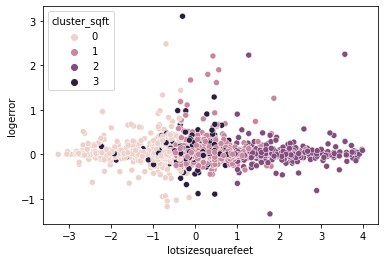

In [63]:
sns.scatterplot(x=train_scaled.lotsizesquarefeet, y=train.logerror, hue=train_scaled.cluster_sqft)

<AxesSubplot:xlabel='calculatedfinishedsquarefeet', ylabel='logerror'>

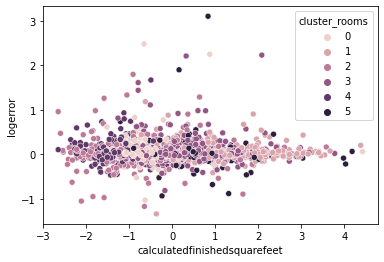

In [64]:
sns.scatterplot(x=train_scaled.calculatedfinishedsquarefeet, y=train.logerror, hue=train_scaled.cluster_rooms)

<AxesSubplot:xlabel='tax_rate', ylabel='logerror'>

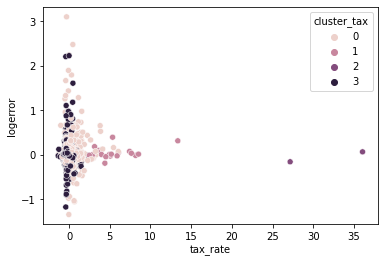

In [65]:
sns.scatterplot(x=train_scaled.tax_rate, y=train.logerror, hue=train_scaled.cluster_tax)

In [66]:
train['age_bin'] = pd.cut(train.age, 
                bins = [0, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140],
                           labels = [0, .066, .133, .2, .266, .333, .40, .466, .533, 
                                     .6, .666, .733, .8, .866, .933])

In [67]:
train.age_bin.value_counts().sort_index()

0.0         2
0.066       1
0.133       7
0.2        33
0.266      41
0.333     254
0.4       799
0.466    1501
0.533     303
0.6       151
0.666     287
0.733      89
0.8        23
0.866       5
0.933       1
Name: age_bin, dtype: int64

(-1.0, 1.0)

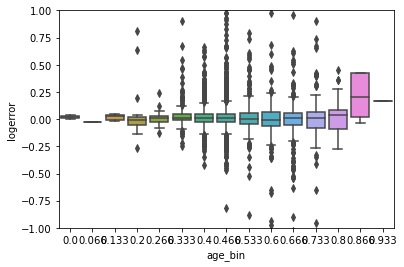

In [68]:
sns.boxplot(y=train.logerror, x=train.age_bin)
plt.ylim(-1, 1)

# Modeling

- Modeling: At least 4 different models are created and their performance is compared. One model is the distinct combination of algorithm, hyperparameters, and features.

In [69]:
# first split into X variables and y target
X_train = train.drop('logerror',axis=1)
y_train = train[['logerror']]

X_validate = validate.drop('logerror',axis=1)
y_validate = validate[['logerror']]

X_test = test.drop('logerror',axis=1)
y_test = test[['logerror']]

<AxesSubplot:title={'center':'LogError Histogram'}, xlabel='LogError', ylabel='Number of Properties'>

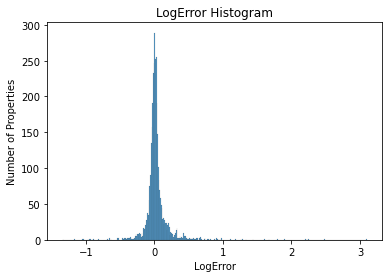

In [70]:
# distribution of log error
plt.title('LogError Histogram')
plt.xlabel('LogError')
plt.ylabel('Number of Properties')
sns.histplot(train.logerror)

In [71]:
# imports to calculate model metrics
from sklearn.metrics import mean_squared_error, explained_variance_score

baseline = train.logerror.mean()

baseline_mse = mean_squared_error(y_train, np.full(y_train.shape, baseline))
baseline_rmse = baseline_mse**1/2

print('Baseline Mean Squared Error:', round(baseline_mse,6))
print('Baseline Root Mean Squared Error:', round(baseline_rmse,6))

Baseline Mean Squared Error: 0.036358
Baseline Root Mean Squared Error: 0.018179


In [72]:
y_train

,logerror
31129,-0.043638
3021,0.035143
7086,-0.220062
42008,-0.081519
55288,-0.049785
...,...
60838,0.034278
76488,-0.026162
16607,0.124285
65599,0.032961


In [73]:
train_model = train_scaled[['calculatedfinishedsquarefeet','bedroomcnt','transaction_month','cluster_tax']]

# create the model object
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(train_model, y_train.logerror)

# predict train
y_train['lm_1'] = lm.predict(train_model)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.logerror, y_train.lm_1)**1/2

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train)

RMSE for OLS using LinearRegression
Training/In-Sample:  0.018167402461245263
